In [1]:
from reprophylo import *

__Genbank file__ containing CO1 seuqences for Notostraca was downloaded. Search term: 'Notostraca[orgn] AND (COI[gene] OR CO1[gene])'

In [3]:
list_loci_in_genbank('Notostraca_COI.gb', 'Notostraca_COI.csv')


There are 16 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
1 instances of CDS,ATP6
1 instances of CDS,ATP8
380 instances of CDS,COI
15 instances of CDS,coi
1 instances of CDS,COII
1 instances of CDS,COIII
1 instances of CDS,cytb
1 instances of CDS,ND1
1 instances of CDS,ND2
1 instances of CDS,ND3
1 instances of CDS,ND4
1 instances of CDS,ND4L
1 instances of CDS,ND5
1 instances of CDS,ND6
1 instances of rRNA,12S rRNA
1 instances of rRNA,16S rRNA
-------------------------------
Gene and count sorted by counts
-------------------------------
380 instances of CDS,COI
15 instances of CDS,coi
1 instances of CDS,ATP6
1 instances of CDS,ATP8
1 instances of CDS,COII
1 instances of CDS,COIII
1 instances of CDS,cytb
1 instances of CDS,ND1
1 instances of CDS,ND2
1 instances of CDS,ND3
1 instances of CDS,ND4
1 instances of CDS,ND4L
1 instances of CDS,ND5
1 instances of CDS,ND6
1 instances of rRNA

In [4]:
!cat Notostraca_COI.csv

dna,CDS,MT-ATP6,ATP6
dna,CDS,MT-ATP8,ATP8
dna,CDS,MT-CO1,COI,coi
dna,CDS,MT-CO2,COII
dna,CDS,MT-CO3,COIII
dna,CDS,MT-CYB,cytb
dna,CDS,MT-ND1,ND1
dna,CDS,MT-ND2,ND2
dna,CDS,MT-ND3,ND3
dna,CDS,MT-ND4,ND4
dna,CDS,MT-ND4L,ND4L
dna,CDS,MT-ND5,ND5
dna,CDS,MT-ND6,ND6
dna,rRNA,rrnL,16S rRNA
dna,rRNA,rrnS,12S rRNA


In [5]:
%%file Notostraca_COI_synonyms.csv
dna,CDS,MT-CO1,COI,coi,1

Writing Notostraca_COI_synonyms.csv


In [142]:
pj = Project("Notostraca_COI_synonyms.csv", pickle='Notostraca_COI_pickle')

In [143]:
pj.read_embl_genbank(["Notostraca_COI.gb"])

In [144]:
pj.species_vs_loci("Notostraca_species.csv")

In [145]:
view_csv_as_table("Notostraca_species.csv","\t")

species                            MT-CO1   
Lepidurus apus                     2        
Lepidurus apus apus                4        
Lepidurus apus lubbocki            10       
Lepidurus apus viridis             1        
Lepidurus arcticus                 6        
Lepidurus bilobatus                1        
Lepidurus couesii                  11       
Lepidurus lemmoni                  4        
Lepidurus packardi                 1        
Lepidurus sp. BOLD:AAI1216         1        
Lepidurus sp. BV-2012              3        
Lepidurus sp. MTD:TW 2042          1        
Lepidurus sp. REA2000              1        
Lepidurus sp. TCM-2013             1        
Triops australiensis               17       
Triops baeticus                    1        
Triops cancriformis                92       
Triops cancriformis cancriformis   9        
Triops granarius                   48       
Triops longicaudatus               134      
Triops mauritanicus                4        
Triops mau

In [146]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


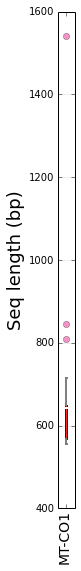

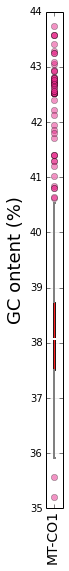

In [147]:
%matplotlib inline
pj.report_seq_stats()

In [149]:
mafft = AlnConf(pj, method_name='mafftDefaults', 
                loci= ['MT-CO1'],
                CDSAlign=True,
                codontable=2,
                cline_args=dict(localpair=True, maxiterate=1000))

mafft --localpair --maxiterate 1000 946301433430429.68_CDS_proteins_MT-CO1.fasta


In [150]:
pj.align([mafft])

In [151]:
print pj.alignments

{'MT-CO1@mafftDefaults': <<class 'Bio.Align.MultipleSeqAlignment'> instance (395 records of length 1539, IUPACAmbiguousDNA()) at 7f60cc495150>}


In [152]:
mafft_gappyout = TrimalConf(pj,alns=['MT-CO1@mafftDefaults'])

trimal -in 836071433430663.83_MT-CO1@mafftDefaults.fasta -gappyout


In [153]:
pj.trim([mafft_gappyout])

In [154]:
raxml_mafft = RaxmlConf(pj, preset="fa", model='GAMMA', matrix='GTR', threads=8, alns=['MT-CO1@mafftDefaults@gappyout'])

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 808031433430680.55_MT-CO1@mafftDefaults@gappyout0 -p 393 -s 808031433430680.55_MT-CO1@mafftDefaults@gappyout.fasta -T 8 -x 398 -N 100


In [155]:
pj.tree([raxml_mafft])

In [156]:
pj.add_qualifier_from_source('organism')

In [157]:
pj.clear_tree_annotations()

supports = {'black':[100,99],
            'dimgray':[99,75],
            'silver':[75,50]}

pj.annotate('.', 'mid','mid',['organism','feature_id'],
            node_support_dict=supports, scale=500, 
            #multifurc=50,
            html="Notostraca_COI.html")

##produce test data set for course##

In [158]:
#write out a fasta containing 100 random COI sequences; 
#this is a complicated way of doing it but to date the 'write_by_locus' method is the only way I know 
#of to extract just a gene from the records and write it to a file.
#So I first write a file that contains only the COI sequences (as opposed to the full seqeunce in case of
#full mitochondrial genomes). THen I read this fasta file back in and print only those that are contained
#in the random list of locus ids.

#write out only COI sequences to file (I have used 'extract by locus' above so that the object only contains
#COI and not the full sequences any more)
pj.write_by_locus(format = 'fasta')

#create a list of 100 random locus ids
recs = []
random_recs_ids = []

for r in pj.records:
    recs.append(r.id)

import random
rand_recs_ids = random.sample(recs, 100)

#parse the fasta file that contains only the COI sequences
handle = open("MT-CO1.fasta", "r")
rs = list(SeqIO.parse(handle, "fasta"))
handle.close()

#select the set of random sequences and write it to file with the header sequence id and taxon id (the latter I
#need to fetch from the original record)
rand_OUT = open("Notostraca_random_queries.fasta","w")
for r in rs:
    r.id = r.id.rpartition("_")[0]
    if r.id in rand_recs_ids:
#        print "search for: %s" %r.id
        for full_rec in pj.records: #loop throuhg the original records and find the taxon id to the record id in question
#            print full_rec.id
            if full_rec.id == r.id:
                rand_OUT.write(">%s|%s\n%s\n" %(r.id,full_rec.features[0].qualifiers['db_xref'][0].split(":")[-1],r.seq))
                break
rand_OUT.close()

#exclude the random loci from all further analyses
pj.exclude(start_from_max=True, **{'MT-CO1': rand_recs_ids})

In [159]:
#redo the alignment for the reduced set of sequences
mafft_reduced = AlnConf(pj, method_name='mafft_reduced_Defaults', 
                loci= ['MT-CO1'],
                CDSAlign=True,
                codontable=2,
                cline_args=dict(localpair=True, maxiterate=1000))

mafft --localpair --maxiterate 1000 818031433431770.26_CDS_proteins_MT-CO1.fasta


In [160]:
pj.align([mafft_reduced])

In [161]:
print pj.alignments

{'MT-CO1@mafftDefaults': <<class 'Bio.Align.MultipleSeqAlignment'> instance (395 records of length 1539, IUPACAmbiguousDNA()) at 7f60cc495150>, 'MT-CO1@mafft_reduced_Defaults': <<class 'Bio.Align.MultipleSeqAlignment'> instance (295 records of length 1539, IUPACAmbiguousDNA()) at 7f60ccc246d0>}


In [162]:
from StringIO import StringIO

aln = AlignIO.read(StringIO(pj.alignments['MT-CO1@mafft_reduced_Defaults'].format('fasta')), 'fasta')

for r in aln:
    r.id = r.id.rpartition("_")[0]
#    print r.id

AlignIO.write(aln, "MT-CO1@mafft_reduced_Defaults.phy", "phylip-relaxed")

#write alignment in fasta. convert the phylip alignemtn that has just been written to fasta for consistent sample names.
fasta_handle = open("MT-CO1@mafft_reduced_Defaults.fasta","w")
in_phylip = open("MT-CO1@mafft_reduced_Defaults.phy","r")
alignments = AlignIO.parse(in_phylip, "phylip-relaxed")

AlignIO.write(alignments, fasta_handle, "fasta")
fasta_handle.close()
in_phylip.close()


__BUILD MAXIMUM LIKELIHOOD REFERENCE TREE to be used in pplacer__

We will do this using RAxML v. 7.2.6.

In [163]:
!raxmlHPC-PTHREADS -T 8 -m GTRGAMMA -s MT-CO1@mafft_reduced_Defaults.phy -n MT-CO1@mafft_reduced_Defaults



IMPORTANT WARNING: Sequences KJ136527.1 and KF979171.1 are exactly identical


IMPORTANT WARNING: Sequences KJ136525.1 and KF979169.1 are exactly identical


IMPORTANT WARNING: Sequences KJ136523.1 and KF979167.1 are exactly identical


IMPORTANT WARNING: Sequences KJ136520.1 and KF979156.1 are exactly identical


IMPORTANT WARNING: Sequences KJ136519.1 and HF911376.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979165.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979164.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979163.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979161.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979160.1 are exactly identical


IMPORTANT WARNING: Sequences KF979166.1 and KF979158.1 are exactly identical


IMPORTANT WARNING: Sequences HF911401.1 and HF911400.1 are exactly identical


IMPORTANT WARNING: Sequences HF911382.1 and HF9113